In [1]:
from VQ_Loss_Plotter import VQ_Loss_Plotter
from tqdm import tqdm
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from dataloader.utils import (
    get_vd_val_test_ids, 
    get_vs_val_test_ids, 
    get_inv_vs_val_test_ids, 
    get_inv_vd_val_test_ids,
    get_experiment_ids
)

In [2]:
all_runs = get_experiment_ids(1) + get_experiment_ids(2) + get_experiment_ids(3)
vs_test = get_vs_val_test_ids()['test_ids']
vs_val = get_vs_val_test_ids()['val_ids']
vd_test = get_vd_val_test_ids()['test_ids']
vd_val = get_vd_val_test_ids()['val_ids']
inv_vs_test = get_inv_vs_val_test_ids()['test_ids']
inv_vs_val = get_inv_vs_val_test_ids()['val_ids']
inv_vd_test = get_inv_vd_val_test_ids()['test_ids']
inv_vd_val = get_inv_vd_val_test_ids()['val_ids']
subsets = [vs_test, vs_val, vd_test, vd_val, inv_vs_test, inv_vs_val, inv_vd_test, inv_vd_val]
vs_test = [run for run in subsets[0] if run in all_runs]
vs_val = [run for run in subsets[1] if run in all_runs]
vd_test = [run for run in subsets[2] if run in all_runs]
vd_val = [run for run in subsets[3] if run in all_runs]
inv_vs_test = [run for run in subsets[4] if run in all_runs]
inv_vs_val = [run for run in subsets[5] if run in all_runs]
inv_vd_test = [run for run in subsets[6] if run in all_runs]
inv_vd_val = [run for run in subsets[7] if run in all_runs]

In [3]:
n_all = len(all_runs)
n_vs_test = len(vs_test)
n_vs_val = len(vs_val)
n_vd_test = len(vd_test)
n_vd_val = len(vd_val)
n_inv_vs_test = len(inv_vs_test)
n_inv_vs_val = len(inv_vs_val)
n_inv_vd_test = len(inv_vd_test)
n_inv_vd_val = len(inv_vd_val)
print("vs", n_all-n_vs_test-n_vs_val, n_vs_test)
print("inv_vs", n_all-n_inv_vs_test-n_inv_vs_val, n_inv_vs_test)
print("vd", n_all-n_vd_test-n_vd_val, n_vd_test)
print("inv_vd", n_all-n_inv_vd_test-n_inv_vd_val, n_inv_vd_test)

vs 26 6
inv_vs 11 5
vd 22 4
inv_vd 10 8


In [4]:
plotter = VQ_Loss_Plotter()

Progress: 100%|██████████| 2/2 [00:14<00:00,  7.50s/it]


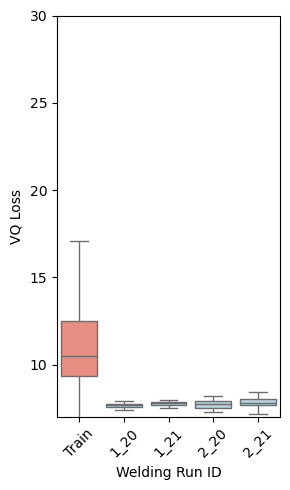

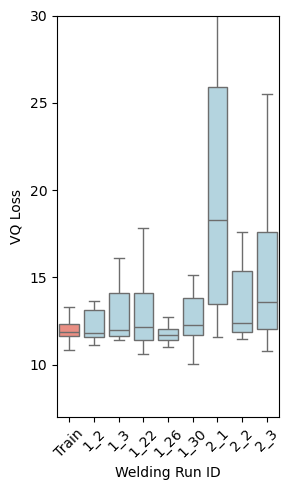

In [7]:
# for split in ["ex", "ex-inv", "vs", "vd", "vs-inv", "vd-inv"]:
#     for beta in  [0.25, 1e-06]:
#         plotter.make_boxplot_all_data(
#             title=f"Trained on all data, tested on {split}", 
#             data_split=f"{split}", 
#             image_path="images/All/", 
#             file_name=f"all_{split}_{beta}", 
#             model_path=f"model_checkpoints/VQ-VAE-Patch/All/VQ-VAE-Patch-asimow-all-split-epochs=50-nEmb=256-beta={beta}.ckpt"
#             )

plotter.boxplots(
    data_splits=["vd", "vd-inv"],
    epochs=[50],
    betas=[1e-06],
    embeddings=[256],
    image_path="images/final/",
    # title="test",
    # file_name="",
    auto_filenames=True,
    figsize=(3, 5),
    rotation=45,
    ylim=(7, 30)

)

In [5]:
# plotter.test_on_noise(
#     data_splits=["ex"],
#     epochs=[50],
#     betas=[0.25],
#     embeddings=[256],
#     image_path="images/final/",
#     figsize=(5, 5),
# )

In [6]:
# noise_data = plotter.get_noise_data()[0][0]
# noise_df = pd.DataFrame(noise_data)
# noise_df
# sns.set_palette("bright")
# plt.figure(figsize=(8, 4))
# plt.title("Generated Noise Cycle")

# sns.lineplot(x=range(len(noise_df)), y=noise_df[0])
# sns.lineplot(x=range(len(noise_df)), y=noise_df[1])
# plt.xlabel("Time")
# plt.ylabel("Random Genereated Current/Voltage")



In [7]:
# plotter.make_boxplot_all_data(
#     title=f"", 
#     data_split=f"ex", 
#     image_path="images/final/", 
#     file_name=f"all_ex_{0.25}", 
#     model_path=f"model_checkpoints/VQ-VAE-Patch/All/VQ-VAE-Patch-asimow-all-split-epochs=50-nEmb=256-beta=0.25.ckpt",
#     figsize=(5, 5),
#     rotation=90
#     )

Progress: 100%|██████████| 2/2 [00:15<00:00,  7.67s/it]


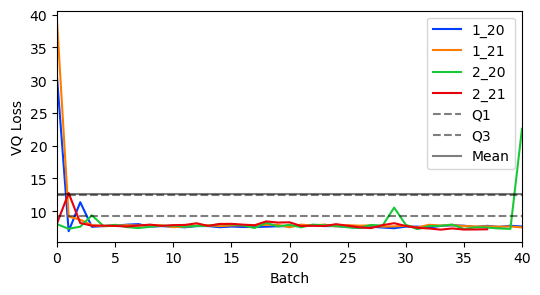

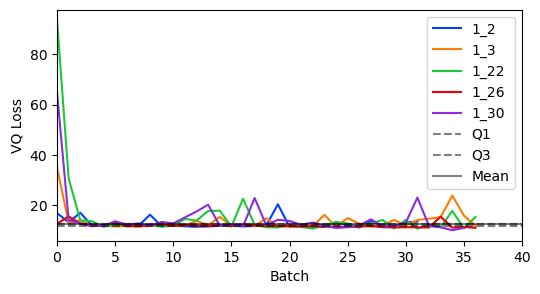

In [8]:
plotter.thresholds(
    data_splits=["vd", "vd-inv"],
    epochs=[50],
    betas=[1e-06],
    embeddings=[256],
    image_path="images/final/",
    title="",
    figsize=(6, 3),
    amount=5,
    xlim=(0, 40),
    # ylim=(0.1, 0.4),
)

In [9]:


# total_iterations = len(data_splits) * len(epochs) * len(embeddings) * len(betas)
# progress_bar = tqdm(total=total_iterations, desc="Progress")
# # Check if data_split is valid
# for data_split in data_splits:
#     split_dict = plotter.split_data(data_split)
#     if data_split in ["ex", "ex-inv"]:
#         split_type = "ExperimentSplit"
#     elif data_split in ["vs", "vd", "vs-inv", "vd-inv"]:
#         split_type = "ParameterSplit"
#     else:
#         raise ValueError(f"Unknown data split: {data_split}")

#     for epoch in epochs:
#         for embedding in embeddings:
#             for beta in betas:
#                 model_path = f"model_checkpoints/VQ-VAE-Patch/Series2/{split_type}/VQ-VAE-Patch-asimow-{data_split}-split-epochs={epoch}-nEmb={embedding}-beta={beta}.ckpt"
#                 loss_df = self.get_vq_loss_df(
#                     split_dict=split_dict, model_path=model_path
#                 )
#                 loss_df, test_ids = plotter.filter_val_data(loss_df, data_split)
#                 # if title is None:
#                 #     # title = f"VQ-Losses Split={data_split} Epoch={epoch} Beta={beta} Embeddings={embedding}"
#                 file_name = f"VQ-Losses-Split={data_split}Epochs={epoch}-nEmb={embedding}-beta={beta}"
#                 plotter.make_boxplot(
#                     df=loss_df,
#                     title="",
#                     image_path=image_path,
#                     test_ids=test_ids,
#                     data_split=data_split,
#                     figsize=figsize,
#                     file_name=file_name,
#                     rotation=rotation,
#                 )
#                 progress_bar.update(1)
# progress_bar.close()